## Name : Roshan Thapa Magar

## UID    : 2331506

# Implementation of MCP Neuron for AND and OR Function.

In [20]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  state_neuron = []

  for x1, x2 in zip(X1, X2):
    if (x1 + x2) >= T:
      state_neuron.append(1)

    else:
        state_neuron.append(0)

  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

  return state_neuron

In [21]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [22]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    state_neuron = []
    for x1, x2 in zip(X1, X2):
      if (x1 + x2) >= T:
        state_neuron.append(1)
      else:
        state_neuron.append(0)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

    return state_neuron


In [23]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/worksheet_3/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


### Viewing the Dataset.

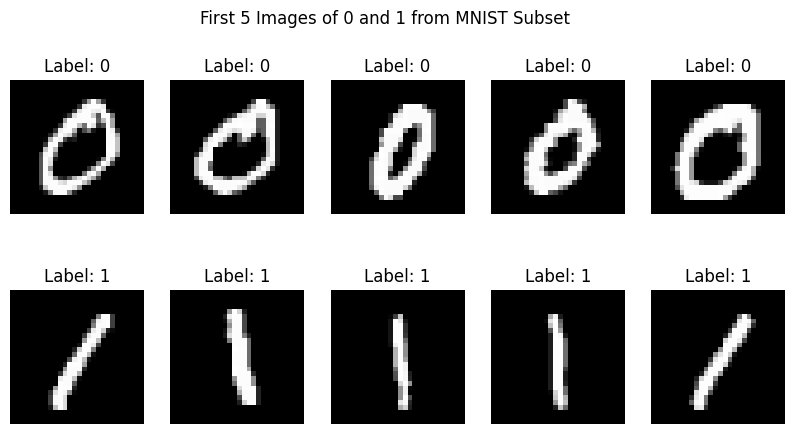

In [26]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [27]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

## Step - 3 - Make a Decision function:

In [28]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)
    #####Your Code Here############  # Activation function (step function)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [29]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    n_samples = X.shape[0]
    for epoch in range(epochs):
      correct_predictions = 0
      for i in range(n_samples):
        output = np.dot(X[i], weights) + bias
        predection = 1 if output >= 0 else 0
        if predection != y[i]:
          weights += learning_rate * (y[i] - predection) * X[i]
          bias += learning_rate * (y[i] - predection)
        else:
          correct_predictions += 1
      accuracy = correct_predictions / n_samples
      #if epoch % 10 == 0:
      print(f"Epoch {epoch}, Accuracy: {accuracy}")


    return weights, bias, accuracy

## Training the Perceptron

In [30]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 0, Accuracy: 0.9966837741808132
Epoch 1, Accuracy: 0.9981839715752072
Epoch 2, Accuracy: 0.9986577181208054
Epoch 3, Accuracy: 0.9986577181208054
Epoch 4, Accuracy: 0.9989735491512041
Epoch 5, Accuracy: 0.9992893801816028
Epoch 6, Accuracy: 0.9997631267272009
Epoch 7, Accuracy: 0.9995262534544019
Epoch 8, Accuracy: 0.9988945913936044
Epoch 9, Accuracy: 0.9992104224240032
Epoch 10, Accuracy: 0.9995262534544019
Epoch 11, Accuracy: 0.9997631267272009
Epoch 12, Accuracy: 1.0
Epoch 13, Accuracy: 1.0
Epoch 14, Accuracy: 1.0
Epoch 15, Accuracy: 1.0
Epoch 16, Accuracy: 1.0
Epoch 17, Accuracy: 1.0
Epoch 18, Accuracy: 1.0
Epoch 19, Accuracy: 1.0
Epoch 20, Accuracy: 1.0
Epoch 21, Accuracy: 1.0
Epoch 22, Accuracy: 1.0
Epoch 23, Accuracy: 1.0
Epoch 24, Accuracy: 1.0
Epoch 25, Accuracy: 1.0
Epoch 26, Accuracy: 1.0
Epoch 27, Accuracy: 1.0
Epoch 28, Accuracy: 1.0
Epoch 29, Accuracy: 1.0
Epoch 30, Accuracy: 1.0
Epoch 31, Accuracy: 1.0
Epoch 32, Accuracy: 1.0
Epoch 33, Accuracy: 1.0
Epoch 34, Accu

## Step 5: Visualize Misclassified Images

In [31]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


Task 3: Perceptron Algorithm for 3 vs 5 Classification.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_2 = pd.read_csv("/content/drive/MyDrive/worksheet_3/mnist_3_and_5.csv")  # Add the correct file path if necessary

# Extract features and labels
X1 = df_0_2.drop(columns=["label"]).values  # 784 pixels
y1 = df_0_2["label"].values  # Labels (0 or 1)
y1 = np.where(y1 == 3, 0, 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X1.shape)
print("Label vector shape:", y1.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


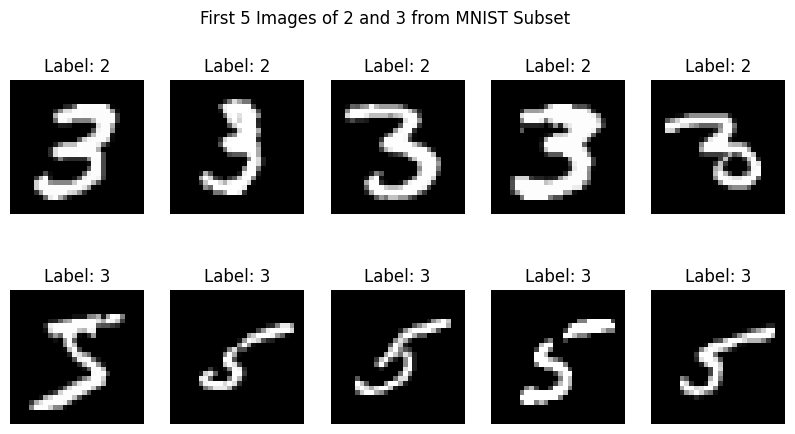

In [33]:
# Separate images for label 0 and label 1
images_2 = X1[y1 == 0]  # Get all images with label 0
images_3 = X1[y1 == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_2) < 5 or len(images_3) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_2[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 2")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 3")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 2 and 3 from MNIST Subset")
    plt.show()

In [34]:
# Initialize weights and bias
weights1 = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias1 = 0
learning_rate= 0.1
epochs = 100

In [35]:
import numpy as np

def decision_function1(X1, weights1, bias1):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions1 = np.dot(X1, weights1) + bias1
    y_pred_all1 = np.where(predictions1 >= 0, 1, 0)
    #####Your Code Here############  # Activation function (step function)
    return y_pred_all1

In [36]:
def train_perceptron1(X1, y1, weights1, bias1, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    n_samples1 = X1.shape[0]
    for epoch in range(epochs):
      correct_predictions = 0
      for i in range(n_samples1):
        output = np.dot(X1[i], weights1) + bias1
        predection = 1 if output >= 0 else 0
        if predection != y1[i]:
          weights1 += learning_rate * (y1[i] - predection) * X1[i]
          bias1 += learning_rate * (y1[i] - predection)
        else:
          correct_predictions += 1
      accuracy1 = correct_predictions / n_samples1
      #if epoch % 10 == 0:
      print(f"Epoch {epoch}, Accuracy: {accuracy1}")


    return weights1, bias1, accuracy1

In [37]:
# After training the model with the perceptron_learning_algorithm
weights1, bias1, accuracy1 = train_perceptron1(X1, y1, weights1, bias1)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy1)

Epoch 0, Accuracy: 0.9157241882524626
Epoch 1, Accuracy: 0.9372491791317038
Epoch 2, Accuracy: 0.9416271433783291
Epoch 3, Accuracy: 0.9474644290404962
Epoch 4, Accuracy: 0.9489237504560379
Epoch 5, Accuracy: 0.9503830718715797
Epoch 6, Accuracy: 0.9598686610726013
Epoch 7, Accuracy: 0.9558555271798613
Epoch 8, Accuracy: 0.9540313754104341
Epoch 9, Accuracy: 0.9565851878876322
Epoch 10, Accuracy: 0.9598686610726013
Epoch 11, Accuracy: 0.958044509303174
Epoch 12, Accuracy: 0.9657059467347683
Epoch 13, Accuracy: 0.9602334914264867
Epoch 14, Accuracy: 0.9635169646114556
Epoch 15, Accuracy: 0.9657059467347683
Epoch 16, Accuracy: 0.9605983217803721
Epoch 17, Accuracy: 0.9624224735497994
Epoch 18, Accuracy: 0.9609631521342575
Epoch 19, Accuracy: 0.9660707770886537
Epoch 20, Accuracy: 0.9700839109813937
Epoch 21, Accuracy: 0.9689894199197373
Epoch 22, Accuracy: 0.9730025538124772
Epoch 23, Accuracy: 0.9682597592119664
Epoch 24, Accuracy: 0.9649762860269975
Epoch 25, Accuracy: 0.97154323239693

Final Accuracy: 0.9869


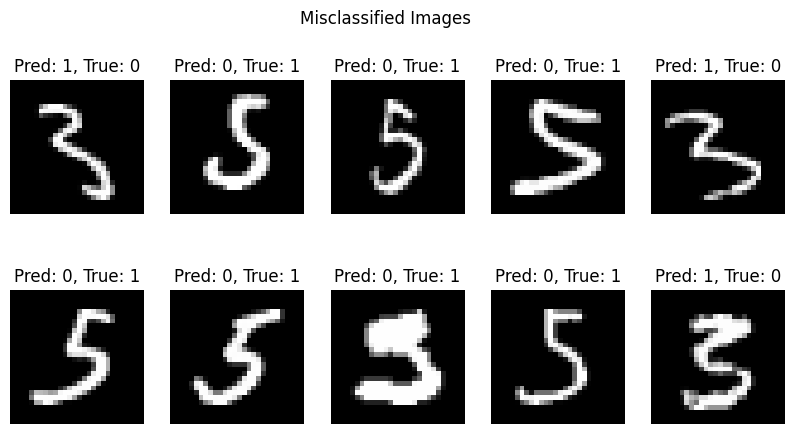

In [38]:
# Get predictions for all data points
predictions1 = np.dot(X1, weights1) + bias1
y_pred1 = np.where(predictions1 >= 0, 1, 0)

# Calculate final accuracy
final_accuracy1 = np.mean(y_pred1 == y1)
print(f"Final Accuracy: {final_accuracy1:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx1 = np.where(y_pred1 != y1)[0]
if len(misclassified_idx1) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax1, idx1 in zip(axes.flat, misclassified_idx1[:10]):  # Show 10 misclassified images
        ax1.imshow(X1[idx1].reshape(28, 28), cmap="gray")
        ax1.set_title(f"Pred: {y_pred1[idx1]}, True: {y1[idx1]}")
        ax1.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")